WHERE ON EARTH CAN I CHARGE MY EV?

INTRODUCTION
In this exercise, I will channel the spirit of great data storytellers to present a compelling narrative about EV Charging Stations in the US. This dataset, sourced from Kaggle (https://www.kaggle.com/datasets/salvatoresaia/ev-charging-stations-us), includes comprehensive information on over 65,000 EV charging stations across the country, detailing their locations, network affiliations, facility types, connection types, and more.

This topic is particularly compelling to me due to the critical need to reduce CO2 emissions for the future of our planet. As a recent electric vehicle owner, I've experienced firsthand the convenience of charging my car at home. However, I quickly realized that many people, especially those living in apartments or homes without accessible electric outlets, face significant challenges in charging their vehicles. This issue is a potential barrier to the widespread adoption of electric cars, which are essential for a sustainable future.

In this project, I aim to explore several key questions:

-Geographic Distribution: Where are EV charging stations currently located in the US, and how does this distribution vary by region?

-Infrastructure Gaps: Are there noticeable disparities in access to charging stations between urban and rural areas?

-Market and Policy Implications: How can the current distribution and future projections of charging stations inform market opportunities for the EV industry and guide urban and rural planning?

Through this analysis, I hope to uncover insights that can inform stakeholders, from policymakers to businesses, about the current state of EV infrastructure and its potential future developments. The findings will be presented through a combination of data exploration, visualization, and interpretation, providing a comprehensive view of this critical aspect of our transition to sustainable transportation.

I used three datasets so far for this analysis: 1) Current EV Charging Stations(https://afdc.energy.gov/data/10962); 2) State Population Metrics (https://data.census.gov/all?q=state%20population); and 3) EV Adoption Rate by State (https://afdc.energy.gov/data/10962)

MY POWERPOINT SLIDE SHOW IS HERE: https://docs.google.com/presentation/d/12Ll_lospMW9X1wPGWwRqFaLx4Eb0cpoLTCJsGfZz1NI/edit?usp=sharing

OBJECTIVE AND RESEARCH QUESTIONS
The primary objective of this project is to analyze the current landscape of electric vehicle (EV) charging stations across the United States. By examining various attributes of these stations, we aim to gain insights into the accessibility and distribution of charging infrastructure. This analysis will help identify opportunities for expansion and highlight potential areas where the availability of charging stations may be lacking.

To achieve this, we will explore the following key research questions:

What is the geographic distribution of EV charging stations in the US?

Purpose: Understand the current spread of charging stations across different states and regions, and identify any clusters or gaps in infrastructure. How does the type and availability of EV charging stations vary by location?


RELEVANCE AND IMPLICATIONS
The findings from this analysis are relevant to a wide range of stakeholders, including policymakers, urban planners, businesses in the EV industry, and consumers. Understanding the current distribution of EV charging stations can help:
-Policymakers: Formulate effective policies and incentives to promote the expansion of EV infrastructure, especially in underserved areas.
-Urban and Rural Planners: Strategize the placement of new charging stations to optimize accessibility and support EV adoption.
-Businesses: Identify market opportunities for new installations, partnerships, and services related to EV charging.
-Consumers: Gain insights into the availability of charging options, which can influence their decisions to purchase electric vehicles.

STRUCTURE OF THE PRESENTATION
The presentation is organized into the following sections:
-Introduction: Overview of the project, motivation, and dataset description.
-Data Exploration: Initial examination of the dataset, including key attributes and summary statistics.
-Facility and Connection Type Analysis: Breakdown of different facility and connection types available across various regions.
-Combine EV adoption dataset with EVCharging dataset to ascertain what the current and future needs for charging stations in each state.
-Key Insights and Recommendations: Summary of findings, potential implications, and suggestions for future development.
-Conclusion: Final thoughts and discussion on the broader impact of EV charging infrastructure on sustainable transportation.

In [2]:
import zipfile
import os

# Path to the ZIP file and directory
zip_file_path = 'EVCharging.zip'
extraction_dir = './extracted_files'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

extracted_files = os.listdir(extraction_dir)
excel_file_path = os.path.join(extraction_dir, extracted_files[0])

# Load the dataset
df = pd.read_excel(excel_file_path)

In [3]:
# Inspect the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Summary of the dataset
print("\nDataset summary:")
print(df.info())

# Basic statistics for numerical columns
print("\nBasic statistics:")
print(df.describe())

First 5 rows of the dataset:
                        Station Name      Street Address         City State  \
0           LADWP - Truesdale Center  11797 Truesdale St   Sun Valley    CA   
1      Los Angeles Convention Center  1201 S Figueroa St  Los Angeles    CA   
2      LADWP - John Ferraro Building       111 N Hope St  Los Angeles    CA   
3         LADWP - Haynes Power Plant       6801 E 2nd St   Long Beach    CA   
4  LADWP - Harbor Generating Station    161 N Island Ave   Wilmington    CA   

     ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
0  91352                 NaN                57.0               2.0   
1  90015                 NaN                 7.0               NaN   
2  90012                 NaN               338.0              12.0   
3  90803                 NaN                19.0               1.0   
4  90744                 NaN                10.0               NaN   

       EV Network        EV Connector Types Access Code Access Detail Code 

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Station Name              3
Street Address           35
City                      5
State                    14
ZIP                       1
EV Level1 EVSE Num    64467
EV Level2 EVSE Num     8457
EV DC Fast Count      55770
EV Network                2
EV Connector Types       36
Access Code               0
Access Detail Code    60210
Facility Type         47537
dtype: int64


In [6]:
# Print the column names to identify the correct names for longitude and latitude
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['Station Name', 'Street Address', 'City', 'State', 'ZIP',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Network', 'EV Connector Types', 'Access Code', 'Access Detail Code',
       'Facility Type'],
      dtype='object')


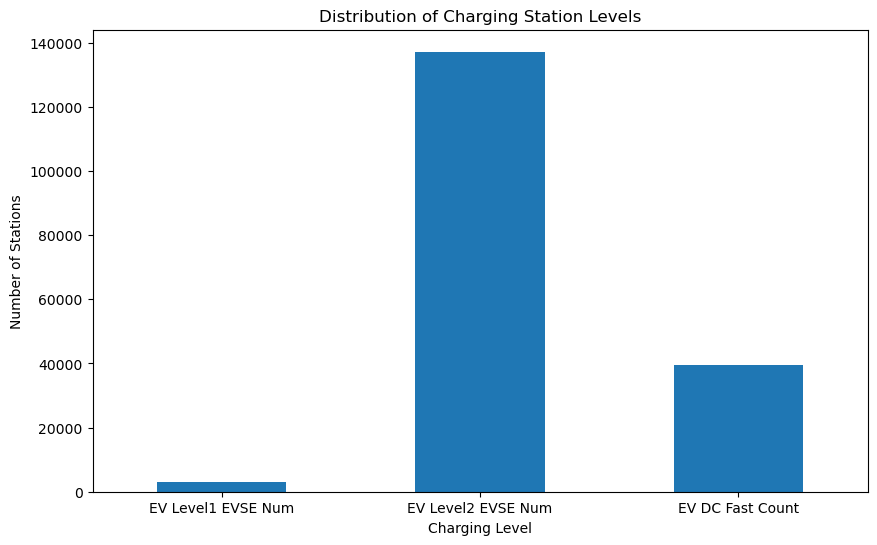

In [7]:
# Distribution of Level 1, Level 2, and DC Fast charging stations
plt.figure(figsize=(10,6))
df[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum().plot(kind='bar')
plt.title('Distribution of Charging Station Levels')
plt.xlabel('Charging Level')
plt.ylabel('Number of Stations')
plt.xticks(rotation=0)
plt.show()

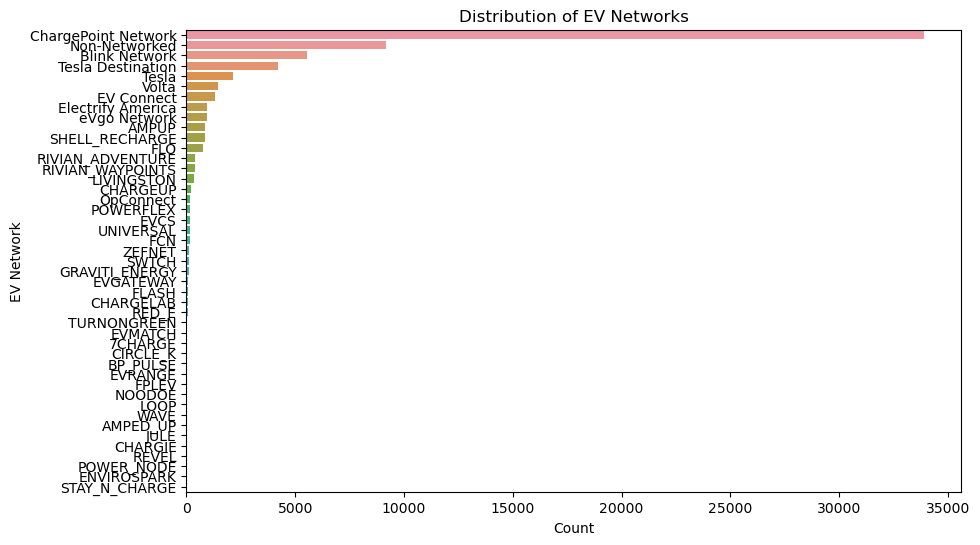

In [18]:
# Distribution of EV networks
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='EV Network', order=df['EV Network'].value_counts().index)
plt.title('Distribution of EV Networks')
plt.xlabel('Count')
plt.ylabel('EV Network')
plt.show()

<Figure size 640x480 with 0 Axes>

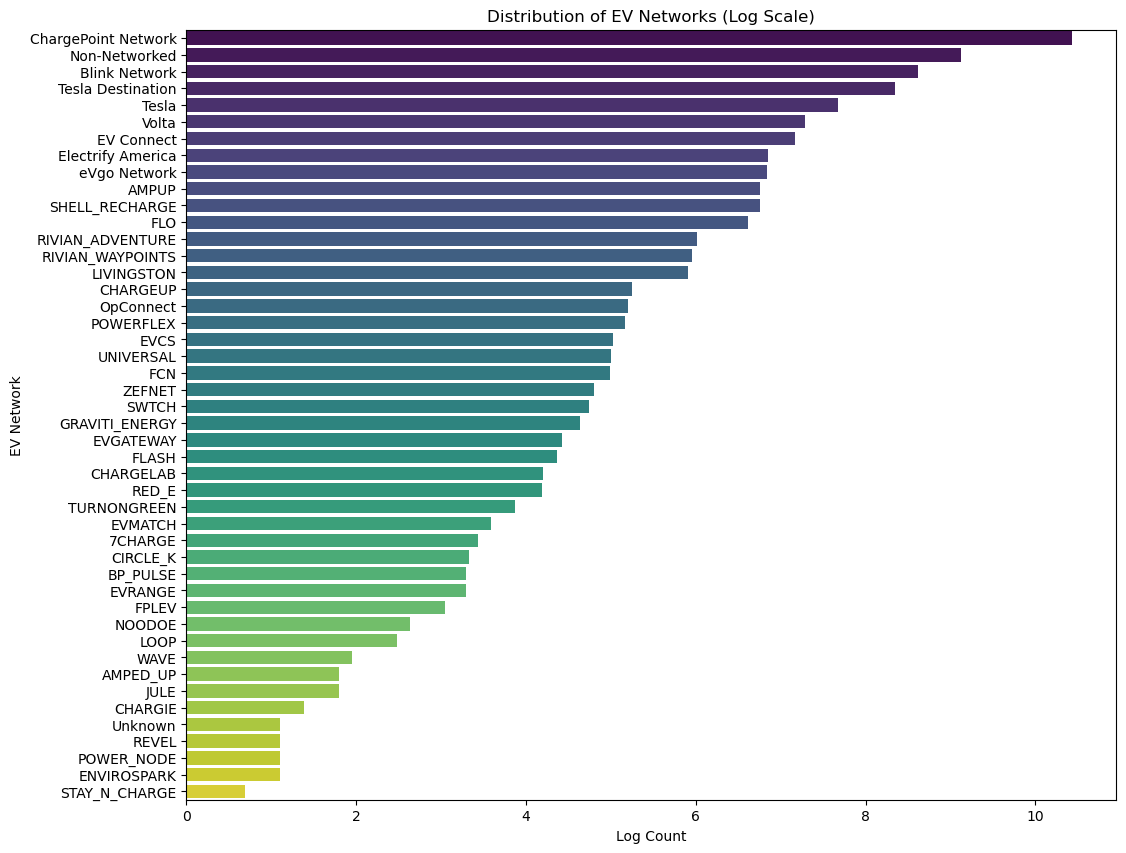

In [90]:
#To address the issue of an overwhelmingly dominant category in our bar plot, we apply a log transformation to the count values. 
#This transformation will help reduce the scale of the dominant category, allowing the other categories to be more visible. 

import numpy as np

# Calculate the log of the counts to reduce the dominance of the top category
ev_network_counts = df['EV Network'].value_counts()
log_ev_network_counts = np.log1p(ev_network_counts)  # log1p is used to handle zero values

# Adjust the layout to provide more space for y-axis labels
plt.subplots_adjust(left=0.8)  # Adjust left padding

# Plot the log-transformed counts
plt.figure(figsize=(12,10))

# Adjust the layout to provide more space for y-axis labels
plt.tight_layout(rect=[0, 0, 1.0, 2.0])  # Adjust right padding


sns.barplot(x=log_ev_network_counts, y=log_ev_network_counts.index, palette="viridis")
plt.title('Distribution of EV Networks (Log Scale)')
plt.xlabel('Log Count')
plt.ylabel('EV Network')
plt.show()

We see that ChargePoint Network has a near monopoloy on charge stations and we should find out why? When we look at the Access
codes, most EV charging stations are on public land. Does ChargePoint have a federal contract? What particular EV Networks
are concentrated in specific regions and why? 

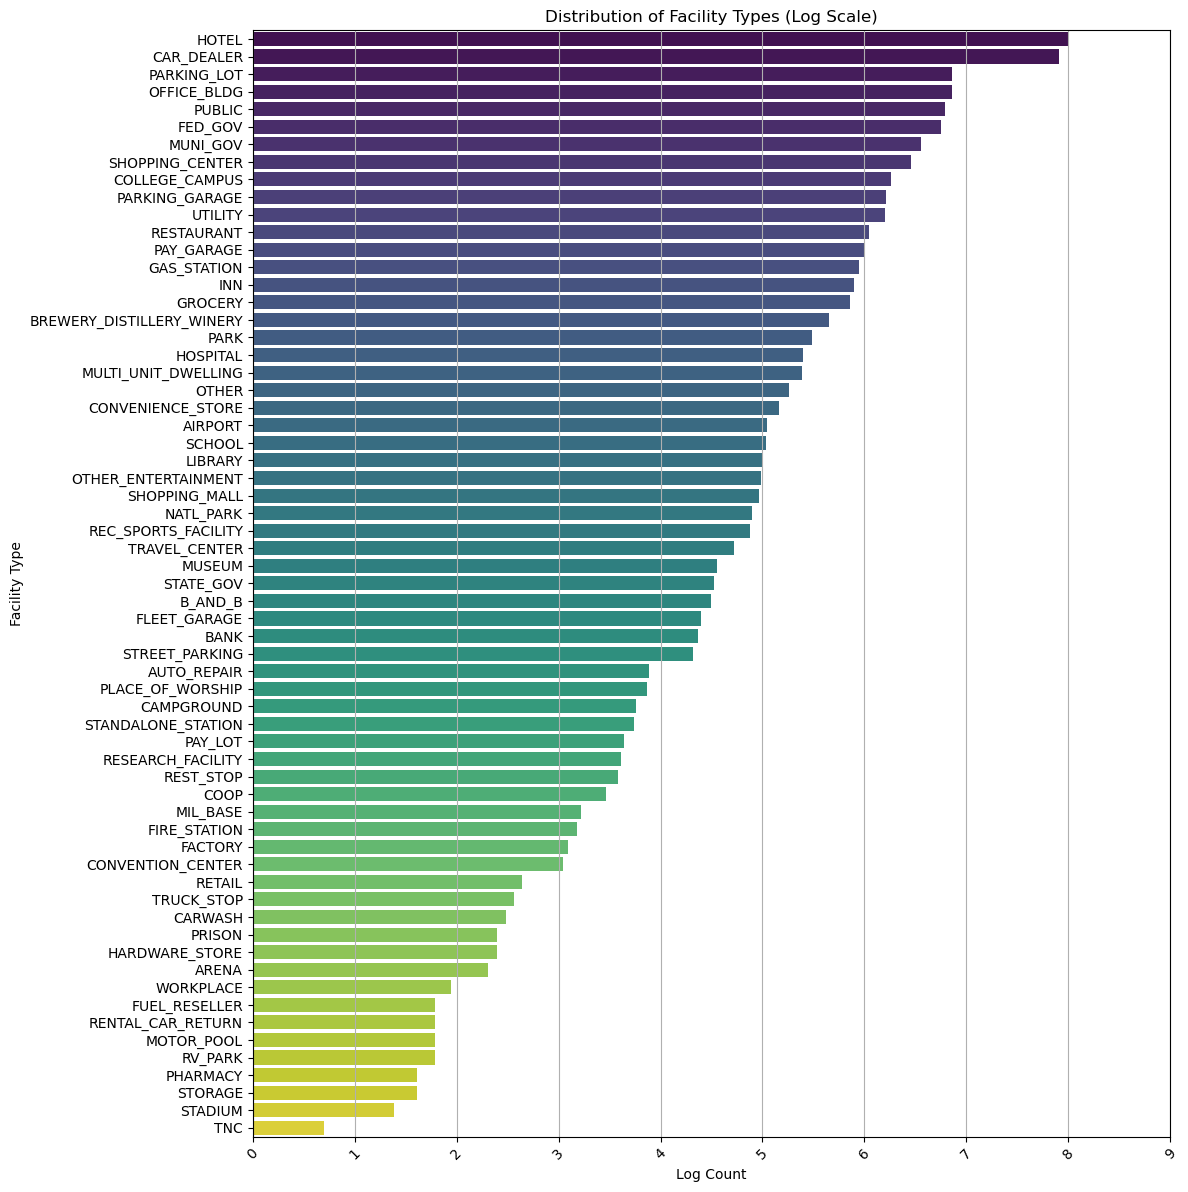

In [15]:
# Plot the log-transformed counts for facility types with adjustments
plt.figure(figsize=(14,8))  # Increase figure width for better readability
sns.barplot(x=log_facility_type_counts, y=log_facility_type_counts.index, palette="viridis")
plt.title('Distribution of Facility Types (Log Scale)')
plt.xlabel('Log Count')
plt.ylabel('Facility Type')

# Adjust the layout to provide more space for y-axis labels
plt.tight_layout(rect=[0, 0, 0.85, 1.5])  # Adjust right padding

# Format the x-axis ticks for better readability
plt.xticks(ticks=np.arange(0, log_facility_type_counts.max()+1, 1), rotation=45)

plt.grid(axis='x')  # Add grid lines for better visual separation
plt.show()


The above chart invites a new potential useful analysis. Which facility types do EV owners use the most and/or prefer? 
Why and why not? We could poll EV users and or try to find another dataset which may explore this question. For example,
workplaces are fairly low on the count. Perhaps a program should be launched to encourage employers to add EV chargers. Wouldn't
more charging stations placed at Rest Stops help EV owners travel long distances? What could be offered as incentives for retail
stores to add EV chargers, i.e. do EV owners spend more at retail stores during their charging session? Which stores would benefit
the most?

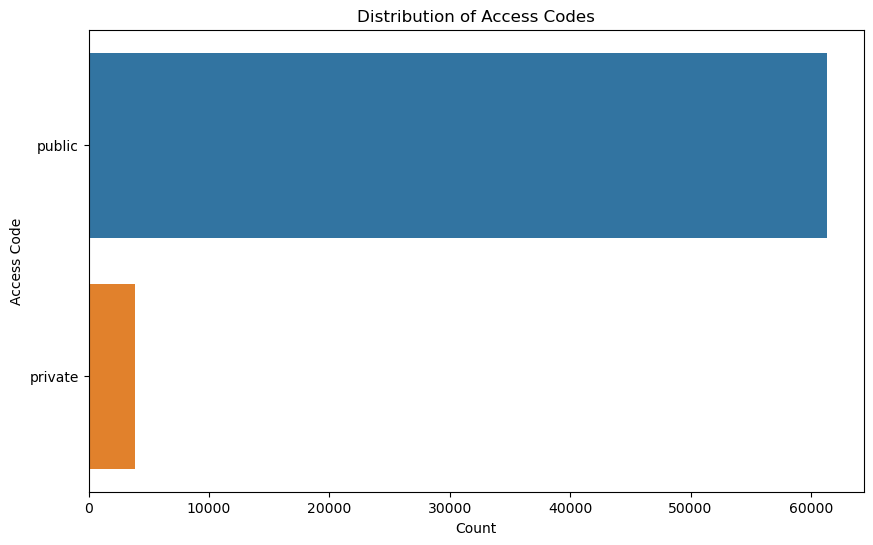

In [21]:
# Analysis of Access Codes (if available)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Access Code', order=df['Access Code'].value_counts().index)
plt.title('Distribution of Access Codes')
plt.xlabel('Count')
plt.ylabel('Access Code')
plt.show()

he vast majority of the charging stations in the dataset are publicly accessible, as indicated by the much larger bar for "public" access. This suggests that most EV charging infrastructure is intended for public use, allowing general EV owners to charge their vehicles. A smaller proportion of charging stations are private, meaning they may be restricted to specific users or groups, such as employees of a company or residents of a particular building.

The dominance of public charging stations suggests a focus on accessibility and support for general EV adoption. The presence of private charging stations indicates that some infrastructure is tailored for specific user groups, potentially in private or gated facilities.

This information can be valuable for understanding the accessibility landscape of EV charging infrastructure and for planning future expansions or addressing gaps in accessibility.

LET'S DEAL WITH MISSING AND 'UNKNOWN' VALUES

In [22]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Station Name              3
Street Address           35
City                      5
State                    14
ZIP                       1
EV Level1 EVSE Num    64467
EV Level2 EVSE Num     8457
EV DC Fast Count      55770
EV Network                2
EV Connector Types       36
Access Code               0
Access Detail Code    60210
Facility Type         47537
dtype: int64


In [23]:
# Filling with 'Unknown'
df['Station Name'].fillna('Unknown', inplace=True)
df['City'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)
df['ZIP'].fillna('00000', inplace=True)  # Assuming ZIP is a string type
df['EV Network'].fillna('Unknown', inplace=True)

In [24]:
# Imputing missing values with zero
df['EV Level1 EVSE Num'].fillna(0, inplace=True)
df['EV Level2 EVSE Num'].fillna(0, inplace=True)
df['EV DC Fast Count'].fillna(0, inplace=True)

# Optionally dropping columns with excessive missing values
df.drop(columns=['Facility Type'], inplace=True)

In [25]:
# Imputing with 'Unknown' or dropping rows
df['Street Address'].fillna('Unknown Address', inplace=True)
df['EV Connector Types'].fillna('Unknown', inplace=True)

In [27]:
# Check for any remaining missing values
missing_values_post_cleaning = df.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_post_cleaning)

Missing values after cleaning:
Station Name              0
Street Address            0
City                      0
State                     0
ZIP                       0
EV Level1 EVSE Num        0
EV Level2 EVSE Num        0
EV DC Fast Count          0
EV Network                0
EV Connector Types        0
Access Code               0
Access Detail Code    60210
dtype: int64


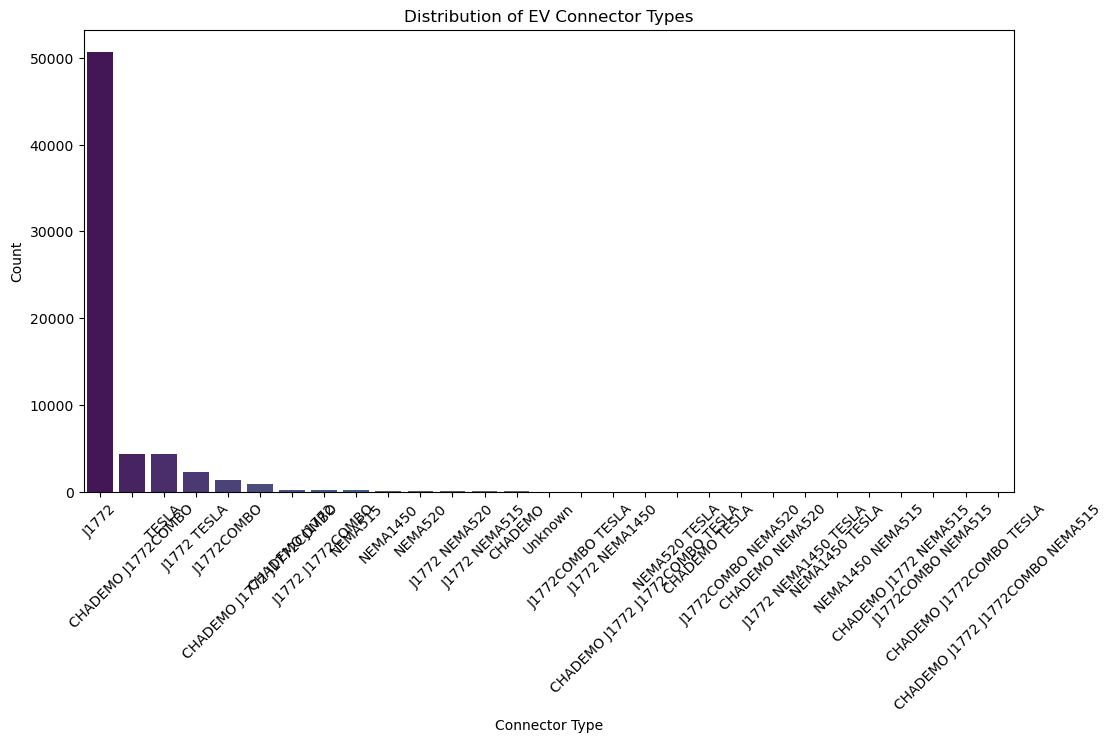

In [28]:
# Distribution of EV Connector Types
connector_type_counts = df['EV Connector Types'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=connector_type_counts.index, y=connector_type_counts.values, palette="viridis")
plt.title('Distribution of EV Connector Types')
plt.xlabel('Connector Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

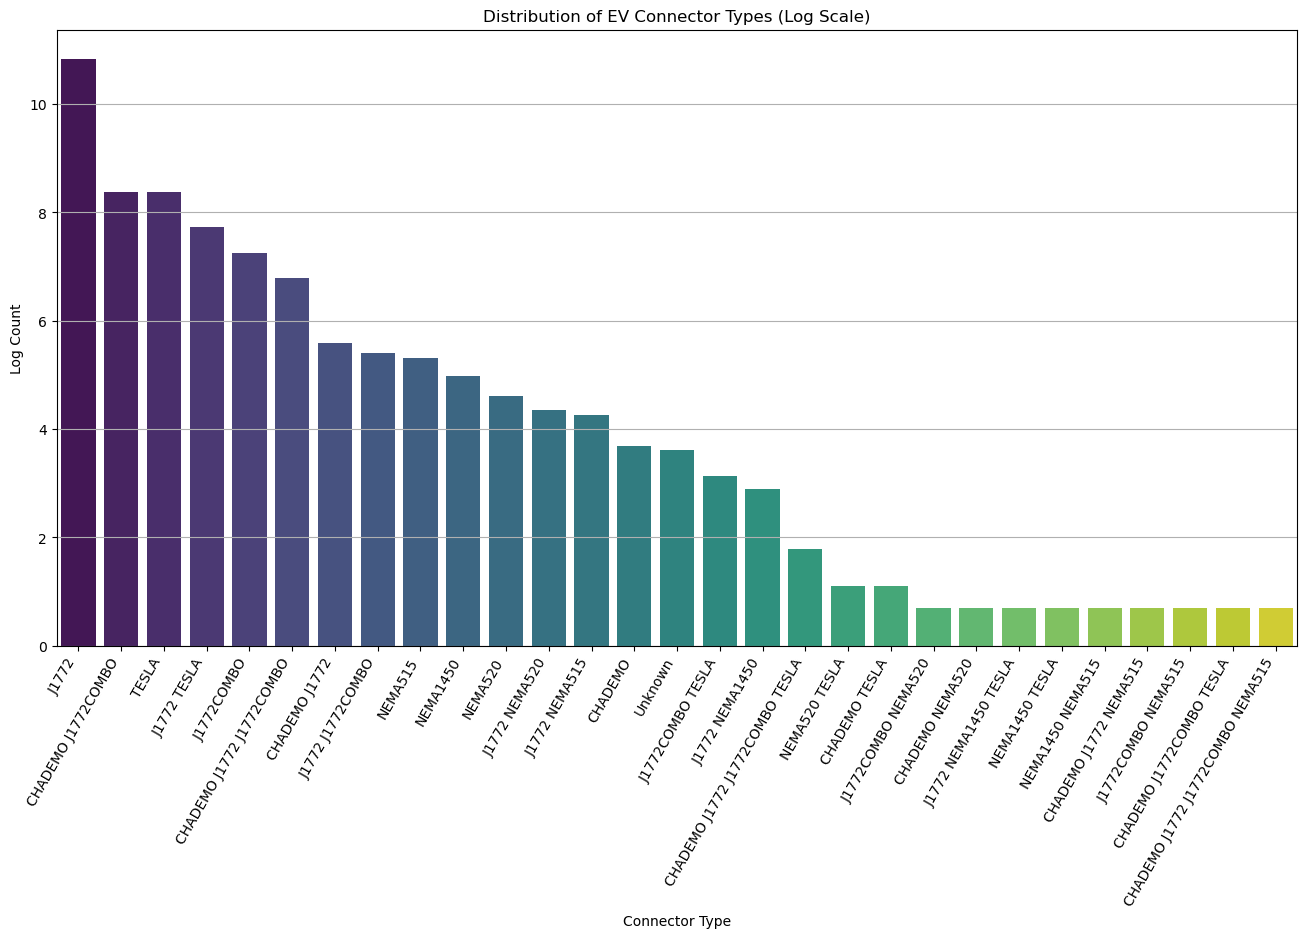

In [33]:
#As the number of J1772 Connector Type is overwhelming, let's adjust our chart to the log 
# Log-transform the counts of EV Connector Types
connector_type_counts = df['EV Connector Types'].value_counts()
log_connector_type_counts = np.log1p(connector_type_counts)  

# Plotting the log-transformed counts with adjusted x-axis
plt.figure(figsize=(16,8))  # Increase figure size for better readability
sns.barplot(x=log_connector_type_counts.index, y=log_connector_type_counts.values, palette="viridis")
plt.title('Distribution of EV Connector Types (Log Scale)')
plt.xlabel('Connector Type')
plt.ylabel('Log Count')
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels and align them to the right
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()

This opens up alot of potential exploratory analysis. Why are J1772 connectors by far the predominant connector type and why? And shouldn't we collapse all the Tesla connectors into one bare or are they all fundamentally different? How many combination types are there are what is the difference? Can any EV user use any connector type? What is the future of the connector types and how can we find out? 

Let's try and filter the more 'rare' connector types into one and see what we get:

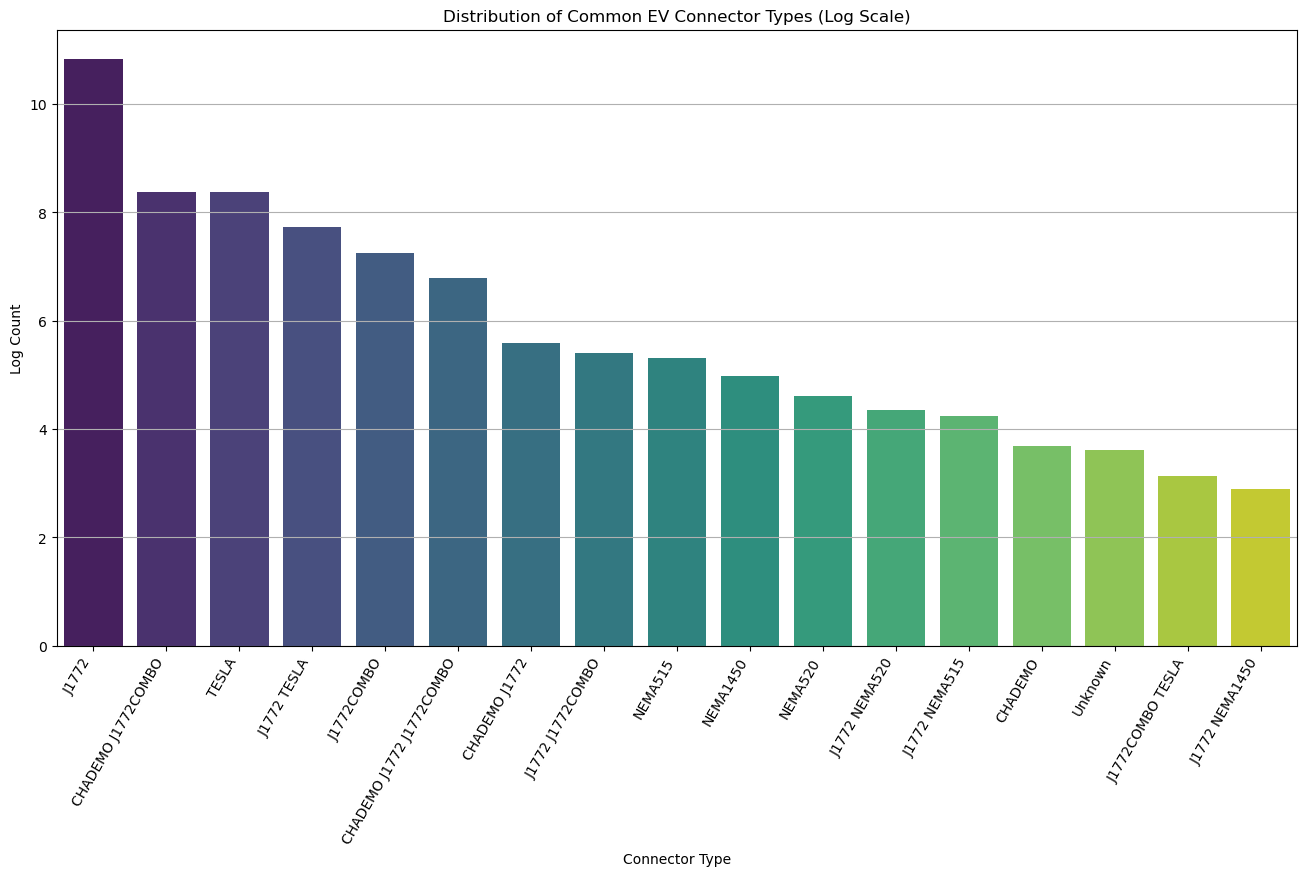

In [34]:
# Example of filtering rare types (less than 10 occurrences)
threshold = 10
common_types = log_connector_type_counts[log_connector_type_counts > np.log1p(threshold)]
plt.figure(figsize=(16,8))
sns.barplot(x=common_types.index, y=common_types.values, palette="viridis")
plt.title('Distribution of Common EV Connector Types (Log Scale)')
plt.xlabel('Connector Type')
plt.ylabel('Log Count')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')
plt.show()

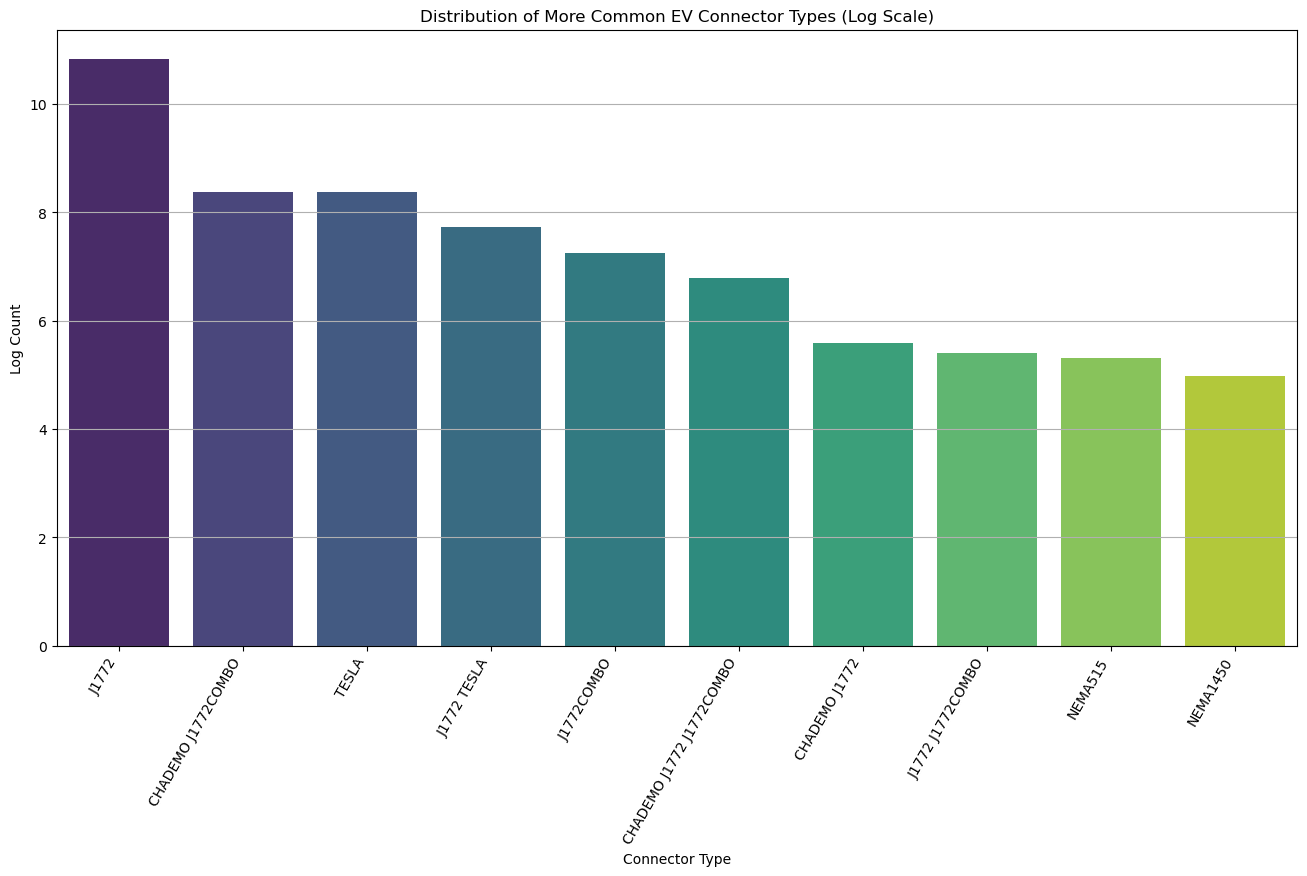

In [35]:
#Let's try to simplify the bar chart even further:
# Set a higher threshold for filtering rare types
threshold = 100  
common_types = connector_type_counts[connector_type_counts > threshold]
log_common_types = np.log1p(common_types)

# Plotting the log-transformed counts for more common types
plt.figure(figsize=(16,8))
sns.barplot(x=log_common_types.index, y=log_common_types.values, palette="viridis")
plt.title('Distribution of More Common EV Connector Types (Log Scale)')
plt.xlabel('Connector Type')
plt.ylabel('Log Count')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')
plt.show()

This chart looks much more manageable and we should learn all about these types and the trend.

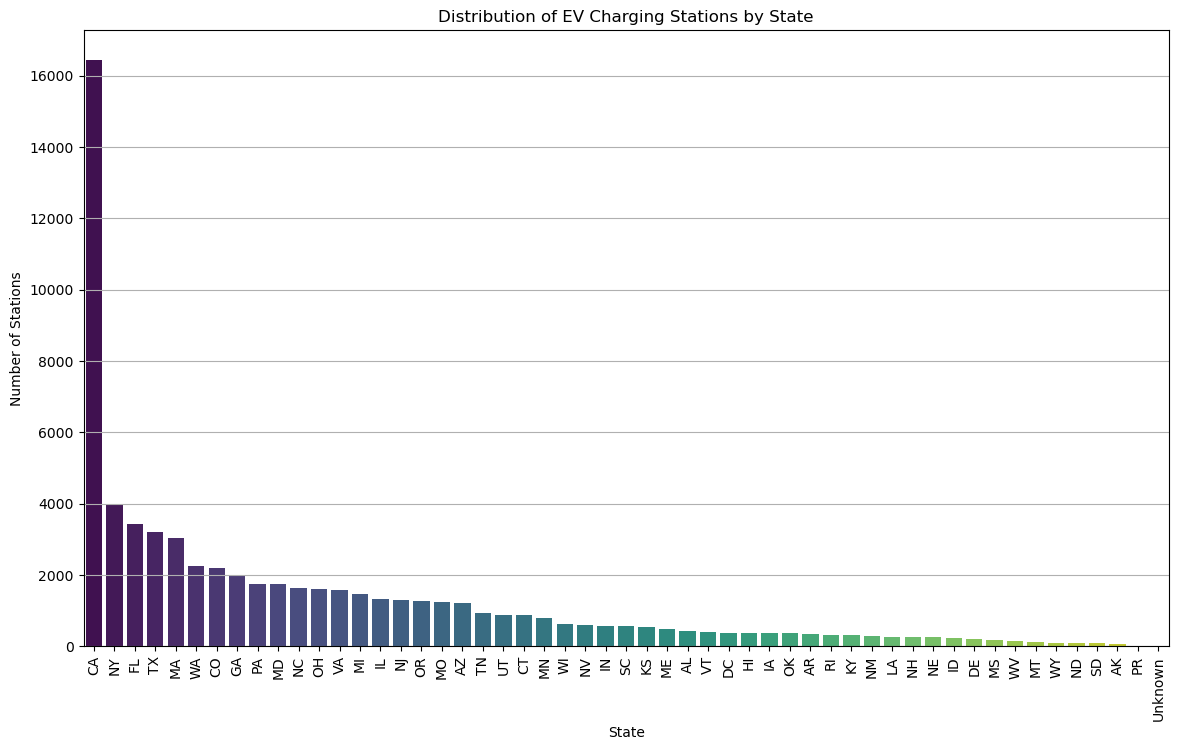

In [36]:
# Count the number of stations per state
state_distribution = df['State'].value_counts()

# Plot the distribution
plt.figure(figsize=(14,8))
sns.barplot(x=state_distribution.index, y=state_distribution.values, palette="viridis")
plt.title('Distribution of EV Charging Stations by State')
plt.xlabel('State')
plt.ylabel('Number of Stations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

California Rules EV (for now!)
Dominance of California:
California (CA) has an overwhelmingly high number of EV charging stations compared to other states, indicating a strong infrastructure for supporting electric vehicles. This is likely due to California's strong policies promoting clean energy and EV adoption.

Other Leading States:
New York (NY), Florida (FL), Texas (TX), and a few other states follow but have significantly fewer stations compared to California. These states have relatively more developed infrastructure compared to the rest of the country.
Long Tail of States:

A long tail can be observed where many states have relatively few charging stations. This indicates a disparity in the availability of EV charging infrastructure across the country, with some states having limited access.
Analysis
The large difference in the number of stations between California and other states suggests that California is leading in EV adoption and infrastructure. This might be due to a combination of higher EV adoption rates, supportive state policies, and a larger population base.

States with fewer stations may need additional investment and support to build out their EV charging infrastructure, particularly as EV adoption grows.

Recommendations
Targeted Investment: States with fewer charging stations should be targeted for additional investment and infrastructure development to support future EV adoption.
Policy Support: Encouraging policies at the state level can help stimulate growth in EV infrastructure, as seen in leading states like California.


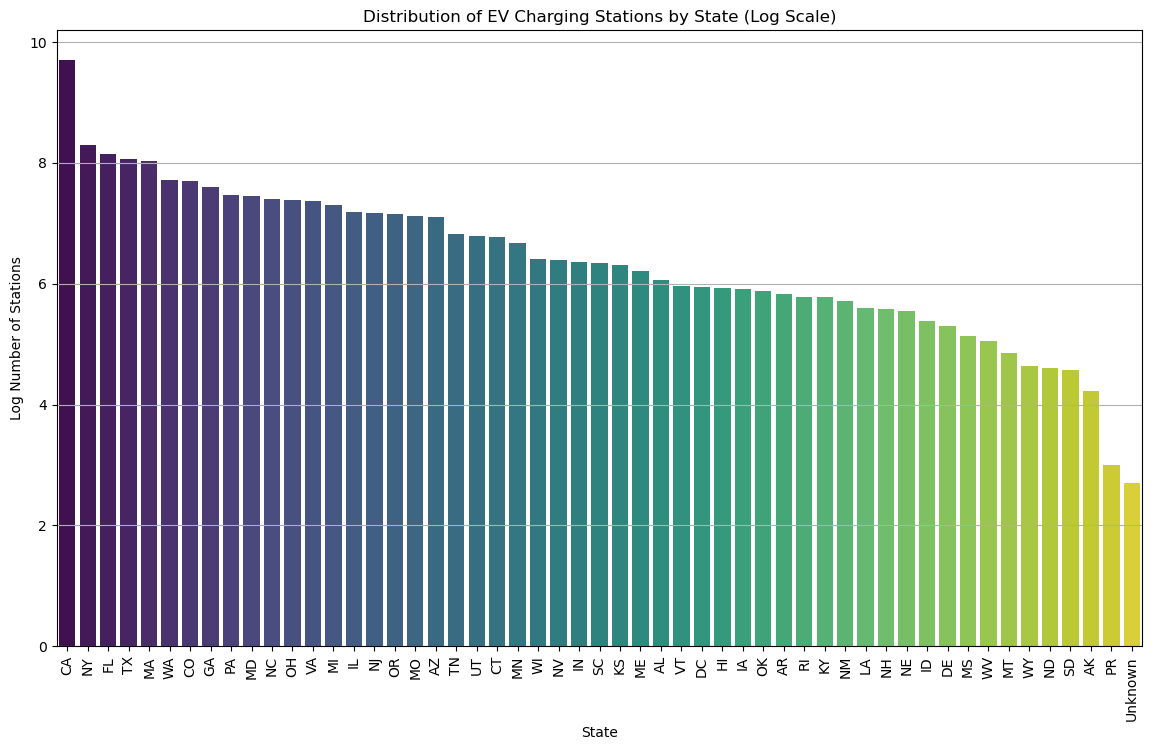

In [37]:
# Log-transform the counts of stations by state
log_state_distribution = np.log1p(state_distribution)  # log1p to handle zero counts

# Plotting the log-transformed counts
plt.figure(figsize=(14,8))
sns.barplot(x=log_state_distribution.index, y=log_state_distribution.values, palette="viridis")
plt.title('Distribution of EV Charging Stations by State (Log Scale)')
plt.xlabel('State')
plt.ylabel('Log Number of Stations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

When we do a logged visual, we reduce the obvious dominance of California to better visualize the other states. It may be useful to combine this data with population statistics data to examine charging stations per capita to see the real impact, ie CA, NY, FL and TX have high populations, but look at MA, WA and CO which are rather high in number compared to their populations. Is this success due to policies and/or are they driven by EV adoption numbers. In other words, is it more important for policies to support EV adoption or does EV adoption support policies, or both?

In [39]:
import zipfile
import os

# Define the path to the ZIP file and the extraction directory
zip_file_path = 'State_Populations.zip'
extraction_dir = './extracted_population_files'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files to identify the relevant CSV
extracted_files = os.listdir(extraction_dir)
print("Extracted files:", extracted_files)

# Assuming the relevant file is 'DECENNIALCD1182020.P1-Data.csv'
population_file = 'DECENNIALCD1182020.P1-Data.csv'
population_file_path = os.path.join(extraction_dir, population_file)

# Load the population data
population_df = pd.read_csv(population_file_path)

# Display the first few rows to verify the data
print(population_df.head())

Extracted files: ['DECENNIALCD1182020.P1-Column-Metadata.csv', 'DECENNIALCD1182020.P1-Table-Notes.txt', 'DECENNIALCD1182020.P1-Data.csv']
        GEO_ID                  NAME   P1_001N  Unnamed: 3
0    Geography  Geographic Area Name   !!Total         NaN
1  0400000US01               Alabama   5024279         NaN
2  0400000US02                Alaska    733391         NaN
3  0400000US04               Arizona   7151502         NaN
4  0400000US05              Arkansas   3011524         NaN


In [41]:
# Assuming the relevant file is 'DECENNIALCD1182020.P1-Data.csv'
population_file = 'DECENNIALCD1182020.P1-Data.csv'
population_file_path = os.path.join(extraction_dir, population_file)

# Load the population data
population_df = pd.read_csv(population_file_path)

# Display the first few rows to verify the data
print(population_df.head())

        GEO_ID                  NAME   P1_001N  Unnamed: 3
0    Geography  Geographic Area Name   !!Total         NaN
1  0400000US01               Alabama   5024279         NaN
2  0400000US02                Alaska    733391         NaN
3  0400000US04               Arizona   7151502         NaN
4  0400000US05              Arkansas   3011524         NaN


In [42]:
# Load the population data and clean it
population_df = pd.read_csv(population_file_path)

# Remove the first row that is not part of the data
population_df = population_df.iloc[1:]

# Rename the columns for clarity
population_df.columns = ['GEO_ID', 'State', 'Population', 'Unnamed']
population_df.drop(columns=['GEO_ID', 'Unnamed'], inplace=True)

# Convert the Population column to integer
population_df['Population'] = population_df['Population'].astype(int)

# Verify the cleaned data
print(population_df.head())

        State  Population
1     Alabama     5024279
2      Alaska      733391
3     Arizona     7151502
4    Arkansas     3011524
5  California    39538223


In [45]:
# Check the unique state names in both dataframes
print("Unique states in EV charging data:", df['State'].unique())
print("Unique states in population data:", population_df['State'].unique())

# Check for NaN values in the merged dataframe
print("Missing values in merged dataframe:")
print(merged_df.isnull().sum())

# Display any rows where the state information is missing after the merge
print("Rows with missing state information:")
print(merged_df[merged_df['State'].isnull()])

Unique states in EV charging data: ['CA' 'VT' 'WA' 'OR' 'ID' 'NY' 'FL' 'WI' 'IA' 'NJ' 'TX' 'SC' 'CT' 'OH'
 'WV' 'MO' 'UT' 'KS' 'MA' 'CO' 'IN' 'MI' 'IL' 'MN' 'NC' 'NH' 'VA' 'TN'
 'AL' 'AZ' 'GA' 'HI' 'MD' 'NV' 'PA' 'AR' 'RI' 'LA' 'DC' 'ME' 'KY' 'NE'
 'MS' 'SD' 'DE' 'NM' 'OK' 'MT' 'ND' 'WY' 'AK' 'PR' 'Unknown']
Unique states in population data: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']
Missing values in merged dataframe:
S

The above output indicates that there is a mismatch between the state naming conventions in the two datasets:
EV Charging Data: Uses state abbreviations (e.g., 'CA', 'NY').
Population Data: Uses full state names (e.g., 'California', 'New York').
Additionally, the Population column in the merged dataframe contains missing values (NaN) for all rows, which confirms the mismatch during the merge.

In [46]:
# Mapping from full state names to abbreviations
state_abbreviation_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 
    'Puerto Rico': 'PR'
}

# Apply the mapping to the population data
population_df['State'] = population_df['State'].map(state_abbreviation_mapping)

# Verify the mapping
print(population_df.head())

# Merge again after standardizing the state names
merged_df = df.merge(population_df, how='left', left_on='State', right_on='State')

# Check if Population column has been filled correctly
print(merged_df[['State', 'Population']].drop_duplicates())

# Proceed with the calculation of chargers per capita if the merge is successful
if merged_df['Population'].notnull().all():
    # Calculate the total number of chargers per state
    merged_df['Total Chargers'] = (merged_df['EV Level1 EVSE Num'].fillna(0) +
                                   merged_df['EV Level2 EVSE Num'].fillna(0) +
                                   merged_df['EV DC Fast Count'].fillna(0))

    # Group by state to get the total chargers and population
    chargers_per_state = merged_df.groupby('State')['Total Chargers'].sum().reset_index()
    chargers_per_state = chargers_per_state.merge(population_df, on='State')

    # Calculate chargers per capita
    chargers_per_state['Chargers per Capita'] = chargers_per_state['Total Chargers'] / chargers_per_state['Population']

    # Sort values for better visualization
    chargers_per_state.sort_values('Chargers per Capita', ascending=False, inplace=True)

    # Plotting the data
    plt.figure(figsize=(14,8))
    sns.barplot(x=chargers_per_state['State'], y=chargers_per_state['Chargers per Capita'], palette="viridis")
    plt.title('EV Chargers per Capita by State')
    plt.xlabel('State')
    plt.ylabel('Chargers per Capita')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()
else:
    print("There are still missing population values after merge.")

  State  Population
1    AL     5024279
2    AK      733391
3    AZ     7151502
4    AR     3011524
5    CA    39538223
         State  Population
0           CA  39538223.0
81          VT    643077.0
96          WA   7705281.0
97          OR   4237256.0
109         ID   1839106.0
114         NY  20201249.0
115         FL  21538187.0
116         WI   5893718.0
125         IA   3190369.0
127         NJ   9288994.0
129         TX  29145505.0
131         SC   5118425.0
134         CT   3605944.0
139         OH  11799448.0
140         WV   1793716.0
142         MO   6154913.0
147         UT   3271616.0
150         KS   2937880.0
155         MA   7029917.0
175         CO   5773714.0
178         IN   6785528.0
179         MI  10077331.0
180         IL  12812508.0
184         MN   5706494.0
191         NC  10439388.0
195         NH   1377529.0
198         VA   8631393.0
201         TN   6910840.0
316         AL   5024279.0
320         AZ   7151502.0
429         GA  10711908.0
438         HI  

      State  Population
0        CA  39538223.0
81       VT    643077.0
96       WA   7705281.0
97       OR   4237256.0
109      ID   1839106.0
114      NY  20201249.0
115      FL  21538187.0
116      WI   5893718.0
125      IA   3190369.0
127      NJ   9288994.0
129      TX  29145505.0
131      SC   5118425.0
134      CT   3605944.0
139      OH  11799448.0
140      WV   1793716.0
142      MO   6154913.0
147      UT   3271616.0
150      KS   2937880.0
155      MA   7029917.0
175      CO   5773714.0
178      IN   6785528.0
179      MI  10077331.0
180      IL  12812508.0
184      MN   5706494.0
191      NC  10439388.0
195      NH   1377529.0
198      VA   8631393.0
201      TN   6910840.0
316      AL   5024279.0
320      AZ   7151502.0
429      GA  10711908.0
438      HI   1455271.0
442      MD   6177224.0
462      NV   3104614.0
485      PA  13002700.0
496      AR   3011524.0
544      RI   1097379.0
571      LA   4657757.0
629      DC    689545.0
696      ME   1362359.0
842      KY   45

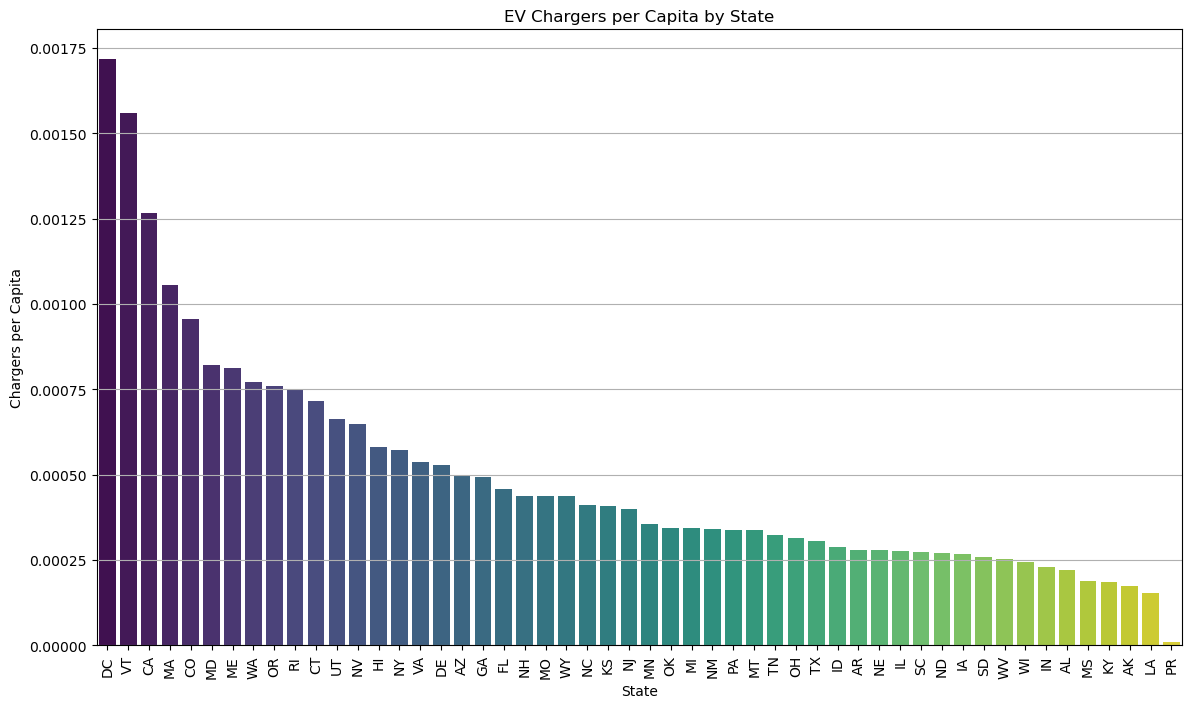

In [47]:
# Remove the 'Unknown' state entry
merged_df = merged_df[merged_df['State'] != 'Unknown']

# Recheck for missing population values
print(merged_df[['State', 'Population']].drop_duplicates())
print("Missing population values after excluding 'Unknown':")
print(merged_df['Population'].isnull().sum())

# Proceed with the calculation of chargers per capita if no missing values
if merged_df['Population'].notnull().all():
    # Calculate the total number of chargers per state
    merged_df['Total Chargers'] = (merged_df['EV Level1 EVSE Num'].fillna(0) +
                                   merged_df['EV Level2 EVSE Num'].fillna(0) +
                                   merged_df['EV DC Fast Count'].fillna(0))

    # Group by state to get the total chargers and population
    chargers_per_state = merged_df.groupby('State')['Total Chargers'].sum().reset_index()
    chargers_per_state = chargers_per_state.merge(population_df, on='State')

    # Calculate chargers per capita
    chargers_per_state['Chargers per Capita'] = chargers_per_state['Total Chargers'] / chargers_per_state['Population']

    # Sort values for better visualization
    chargers_per_state.sort_values('Chargers per Capita', ascending=False, inplace=True)

    # Plotting the data
    plt.figure(figsize=(14,8))
    sns.barplot(x=chargers_per_state['State'], y=chargers_per_state['Chargers per Capita'], palette="viridis")
    plt.title('EV Chargers per Capita by State')
    plt.xlabel('State')
    plt.ylabel('Chargers per Capita')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()
else:
    print("There are still missing population values after filtering out 'Unknown'.")

So we can now see that 'DC' and 'VT' are doing better at providing EV chargers to their populations than California. So California, does not, in fact rule. And why is 'MA' and 'CO' doing nearly as well as CA? Is EV adoption growing as rapidly as DC, VT or CA? Why is EV charging lagging so much behind in other states? Now we see that Texas, which has alot of chargers and 4th in the number of EV charging stations, is actually 18th from the bottom (or in the lowest half). It seems apparant that the 'blue' states are more or less in the top 50% and the 'red' states are mostly in the bottom 50%. But does this mean that government policies are necessarily the main variable for EV station development. It could be that people in red states just don't want to adopt EV cars (and they like gasoline). More analysis is essential to answer that question.

In [50]:
#Let's do more analysis with ev adoption dataset:
# Load the EV adoption data
ev_adoption_file_path = '10962-ev-registration-counts-by-state_6-11-24.xlsx'
ev_adoption_df = pd.read_excel(ev_adoption_file_path)

# Display the first few rows to inspect the data
print(ev_adoption_df.head())

   Unnamed: 0                               Unnamed: 1          Unnamed: 2  \
0         NaN  Electric Vehicle Registrations by State                 NaN   
1         NaN                                    State  Registration Count   
2         NaN                                  Alabama               11831   
3         NaN                                   Alaska                2538   
4         NaN                                  Arizona               84611   

   Unnamed: 3 Unnamed: 4  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  


In [51]:
# Load the EV adoption data, skipping the first two rows
ev_adoption_df = pd.read_excel(ev_adoption_file_path, skiprows=2)

# Select and rename the relevant columns
ev_adoption_df = ev_adoption_df.iloc[:, [1, 2]]
ev_adoption_df.columns = ['State', 'Registration Count']

# Remove any possible extra whitespace in state names
ev_adoption_df['State'] = ev_adoption_df['State'].str.strip()

# Display the cleaned data
print(ev_adoption_df.head())

        State  Registration Count
0     Alabama               11831
1      Alaska                2538
2     Arizona               84611
3    Arkansas                6572
4  California             1178948


In [54]:
# Unique state names in chargers_per_state
print("Unique states in chargers_per_state:", chargers_per_state['State'].unique())

# Unique state names in ev_adoption_df
print("Unique states in ev_adoption_df:", ev_adoption_df['State'].unique())

Unique states in chargers_per_state: ['DC' 'VT' 'CA' 'MA' 'CO' 'MD' 'ME' 'WA' 'OR' 'RI' 'CT' 'UT' 'NV' 'HI'
 'NY' 'VA' 'DE' 'AZ' 'GA' 'FL' 'NH' 'MO' 'WY' 'NC' 'KS' 'NJ' 'MN' 'OK'
 'MI' 'NM' 'PA' 'MT' 'TN' 'OH' 'TX' 'ID' 'AR' 'NE' 'IL' 'SC' 'ND' 'IA'
 'SD' 'WV' 'WI' 'IN' 'AL' 'MS' 'KY' 'AK' 'LA' 'PR']
Unique states in ev_adoption_df: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Total']


In [55]:
# Define a mapping from full state names to abbreviations
state_abbreviation_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Puerto Rico': 'PR'
}

# Map full state names to abbreviations in ev_adoption_df
ev_adoption_df['State'] = ev_adoption_df['State'].map(state_abbreviation_mapping)

# Display the transformed data to verify
print(ev_adoption_df.head())

  State  Registration Count
0    AL               11831
1    AK                2538
2    AZ               84611
3    AR                6572
4    CA             1178948


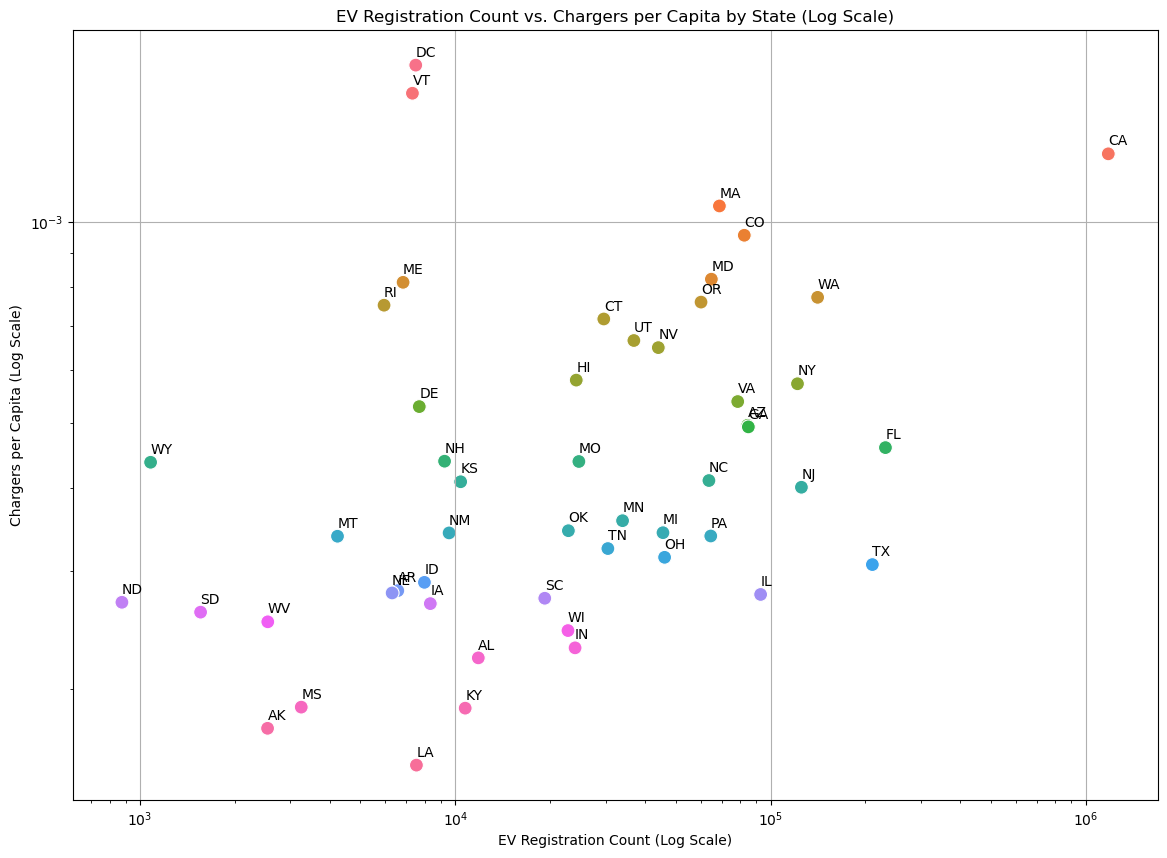

In [59]:
import matplotlib.pyplot as plt

# Plot without the legend and with more space between labels and points
plt.figure(figsize=(14,10))
sns.scatterplot(x=ev_analysis_df['Registration Count'], y=ev_analysis_df['Chargers per Capita'], 
                hue=ev_analysis_df['State'], s=100, legend=False)  # Remove legend with legend=False
plt.xscale('log')
plt.yscale('log')
plt.title('EV Registration Count vs. Chargers per Capita by State (Log Scale)')
plt.xlabel('EV Registration Count (Log Scale)')
plt.ylabel('Chargers per Capita (Log Scale)')
plt.grid(True)

# Add labels for each point with more space between label and point
for line in range(0, ev_analysis_df.shape[0]):
    plt.text(ev_analysis_df['Registration Count'][line], 
             ev_analysis_df['Chargers per Capita'][line] + ev_analysis_df['Chargers per Capita'][line]*0.03,  # Adjust y position
             ev_analysis_df['State'][line], horizontalalignment='left', size='medium', color='black')

plt.show()

Although this tells us alot, it's still not apples and apples because even though Florida and Texas are high in EV adoption, our metrics are not the same as the Chargers. We should look at EV adoption per capita. This will entail more data manipulation.

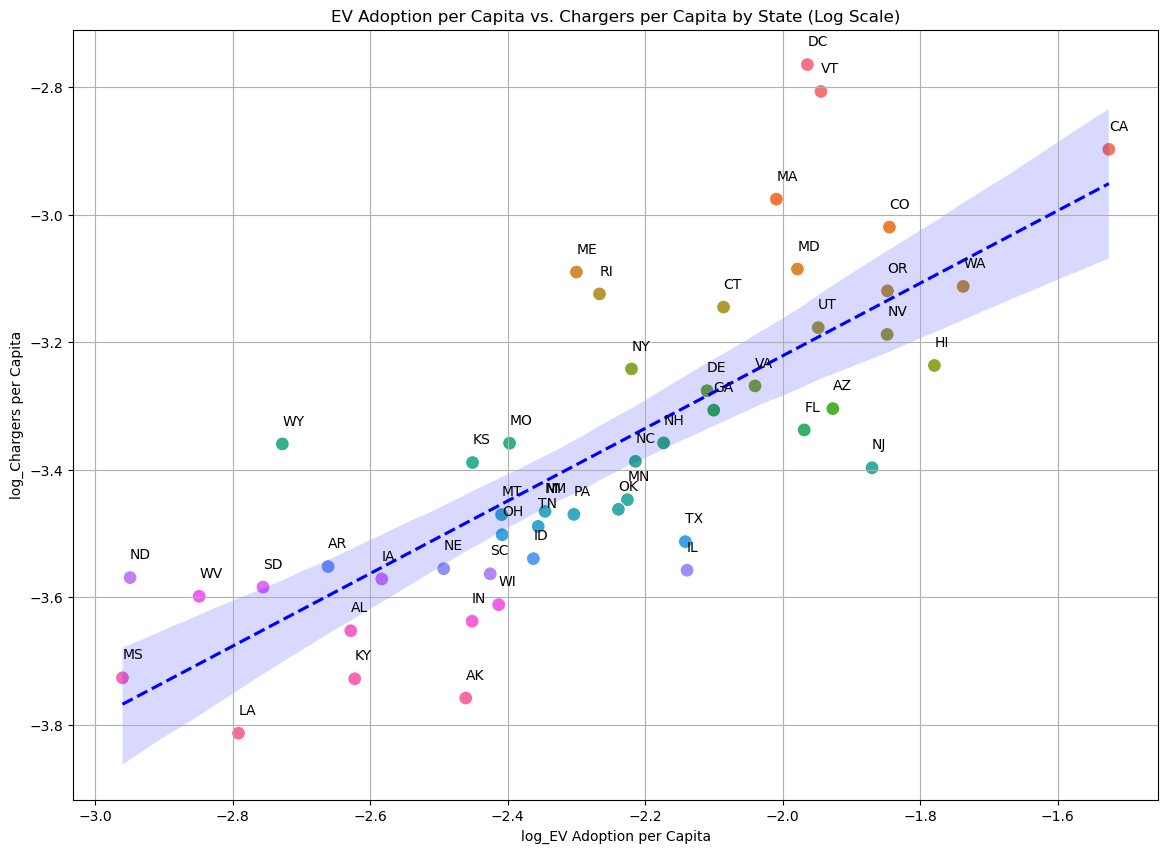

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate EV Adoption per Capita
ev_analysis_df['EV Adoption per Capita'] = ev_analysis_df['Registration Count'] / ev_analysis_df['Population']

# Create log-transformed columns for plotting
ev_analysis_df['log_EV Adoption per Capita'] = np.log10(ev_analysis_df['EV Adoption per Capita'])
ev_analysis_df['log_Chargers per Capita'] = np.log10(ev_analysis_df['Chargers per Capita'])

# Scatter plot with log scales (manually log-transformed data)
plt.figure(figsize=(14,10))
sns.scatterplot(x='log_EV Adoption per Capita', y='log_Chargers per Capita', 
                data=ev_analysis_df, hue='State', s=100, legend=False)
plt.title('EV Adoption per Capita vs. Chargers per Capita by State (Log Scale)')
plt.xlabel('log_EV Adoption per Capita')
plt.ylabel('log_Chargers per Capita')
plt.grid(True)

# Add labels for each point with more space between label and point
for line in range(0, ev_analysis_df.shape[0]):
    plt.text(ev_analysis_df['log_EV Adoption per Capita'][line], 
             ev_analysis_df['log_Chargers per Capita'][line] + 0.03,  # Adjust y position
             ev_analysis_df['State'][line], horizontalalignment='left', size='medium', color='black')

# Add a trendline using the log-transformed data
sns.regplot(x='log_EV Adoption per Capita', 
            y='log_Chargers per Capita', 
            data=ev_analysis_df, 
            scatter=False, 
            color='blue', 
            line_kws={'linestyle':'--'})

plt.show()

Key Observations:
Positive Correlation: The trendline indicates a positive correlation between EV adoption per capita and chargers per capita. As EV adoption per capita increases, the number of chargers per capita also tends to increase.

Above/Below Trendline:
Above the Trendline: States above the trendline, such as Vermont (VT) and District of Columbia (DC), have more chargers per capita than would be expected given their EV adoption per capita. These states are potentially leading in charging infrastructure relative to their EV population.

Below the Trendline: States below the trendline, like Texas (TX) and Florida (FL), have fewer chargers per capita relative to their EV adoption per capita. These states might need to increase charging infrastructure to meet the needs of their growing EV population.

Cluster of States: There’s a notable cluster of states around the middle of the plot. This indicates that many states have similar levels of EV adoption and charging infrastructure. However, outliers like California (CA) with high EV adoption and chargers per capita, and states like Mississippi (MS) and Louisiana (LA) with low values on both axes, stand out.

Trendline Slope and Confidence Interval: The slope of the trendline shows the general direction of the relationship, while the shaded area represents the confidence interval. The narrow confidence interval suggests a relatively consistent relationship between the two variables, with some variations.

Further exploration could include looking at factors influencing why certain states are above or below the trendline, such as state policies, urban density, and availability of federal or state incentives.

COMPARISON OF CURRENT INFRASTRUCTURE TO FUTURE NEEDS

National Renewable Energy Laboratory estimates that by 2030 there will be 33 million EVs on the road and 28 million EV charging ports will be needed to support them. The majority of charging will be at home and work, with the public network for opportunity charging and less common long trips.

Of the 28 million charging ports, 25.7 million (92%) are expected to be private Level 1 (L1) and Level 2 (L2) chargers at single-family homes. Additionally, there will be an estimated 2.1 million (7.6%) public and private L2 chargers at multifamily homes, workplaces, stores, restaurants, and hotels. Estimates show 182,000 (~1%) DC Fast charging ports would be needed at public charging stations, primarily to support those with no access to consistent off-street parking, as well as for long distance travel. 

In [ ]:
#Comparison of Current Infrastructure to Future Needs
#Let's start by analyzing the current infrastructure in comparison to the projected needs for 2030.
#Current Charging Ports by Type: First, we'll calculate the number of each type of charging port currently available in the dataset:

In [66]:
# Count of different charger types from the current dataset
current_charger_counts = {
    'Level 1': df['EV Level1 EVSE Num'].sum(),
    'Level 2': df['EV Level2 EVSE Num'].sum(),
    'DC Fast': df['EV DC Fast Count'].sum()
}

# Display the counts
current_charger_counts

{'Level 1': 2921.0, 'Level 2': 137180.0, 'DC Fast': 39385.0}

In [67]:
# Projected counts for 2030
projected_charger_counts = {
    'Level 1': 0.92 * 28000000,  # 92% of 28 million
    'Level 2': 0.076 * 28000000,  # 7.6% of 28 million
    'DC Fast': 0.01 * 28000000  # 1% of 28 million
}

# Display the projected counts
projected_charger_counts

{'Level 1': 25760000.0, 'Level 2': 2128000.0, 'DC Fast': 280000.0}

In [68]:
# Calculate the difference between current and projected counts
difference_counts = {key: projected_charger_counts[key] - current_charger_counts.get(key, 0) for key in projected_charger_counts}

# Display the differences
difference_counts

{'Level 1': 25757079.0, 'Level 2': 1990820.0, 'DC Fast': 240615.0}

In [70]:
# Calculate projected chargers per capita for 2030
ev_analysis_df['Projected Chargers per Capita'] = ev_analysis_df['Population'] * (projected_charger_counts['Level 1'] + projected_charger_counts['Level 2'] + projected_charger_counts['DC Fast']) / 28000000

# Compare current chargers per capita with projected needs
ev_analysis_df['Difference in Chargers per Capita'] = ev_analysis_df['Projected Chargers per Capita'] - ev_analysis_df['Chargers per Capita']

# Display the differences per state
ev_analysis_df[['State', 'Chargers per Capita', 'Projected Chargers per Capita', 'Difference in Chargers per Capita']]

,State,Chargers per Capita,Projected Chargers per Capita,Difference in Chargers per Capita
0,DC,0.001719,6.936823e+05,6.936823e+05
1,VT,0.001560,6.469355e+05,6.469355e+05
2,CA,0.001266,3.977545e+07,3.977545e+07
3,MA,0.001057,7.072097e+06,7.072097e+06
4,CO,0.000956,5.808356e+06,5.808356e+06
5,MD,0.000821,6.214287e+06,6.214287e+06
6,ME,0.000813,1.370533e+06,1.370533e+06
7,WA,0.000772,7.751513e+06,7.751513e+06
8,OR,0.000759,4.262680e+06,4.262680e+06
9,RI,0.000751,1.103963e+06,1.103963e+06


In [71]:
# States with the largest gaps in chargers per capita
largest_gaps_df = ev_analysis_df.sort_values(by='Difference in Chargers per Capita', ascending=False).head(10)

# Display these states
largest_gaps_df[['State', 'Chargers per Capita', 'Projected Chargers per Capita', 'Difference in Chargers per Capita']]

,State,Chargers per Capita,Projected Chargers per Capita,Difference in Chargers per Capita
2,CA,0.001266,3.977545e+07,3.977545e+07
34,TX,0.000307,2.932038e+07,2.932038e+07
19,FL,0.000460,2.166742e+07,2.166742e+07
14,NY,0.000573,2.032246e+07,2.032246e+07
30,PA,0.000339,1.308072e+07,1.308072e+07
38,IL,0.000277,1.288938e+07,1.288938e+07
33,OH,0.000315,1.187024e+07,1.187024e+07
18,GA,0.000494,1.077618e+07,1.077618e+07
23,NC,0.000410,1.050202e+07,1.050202e+07
28,MI,0.000343,1.013779e+07,1.013779e+07


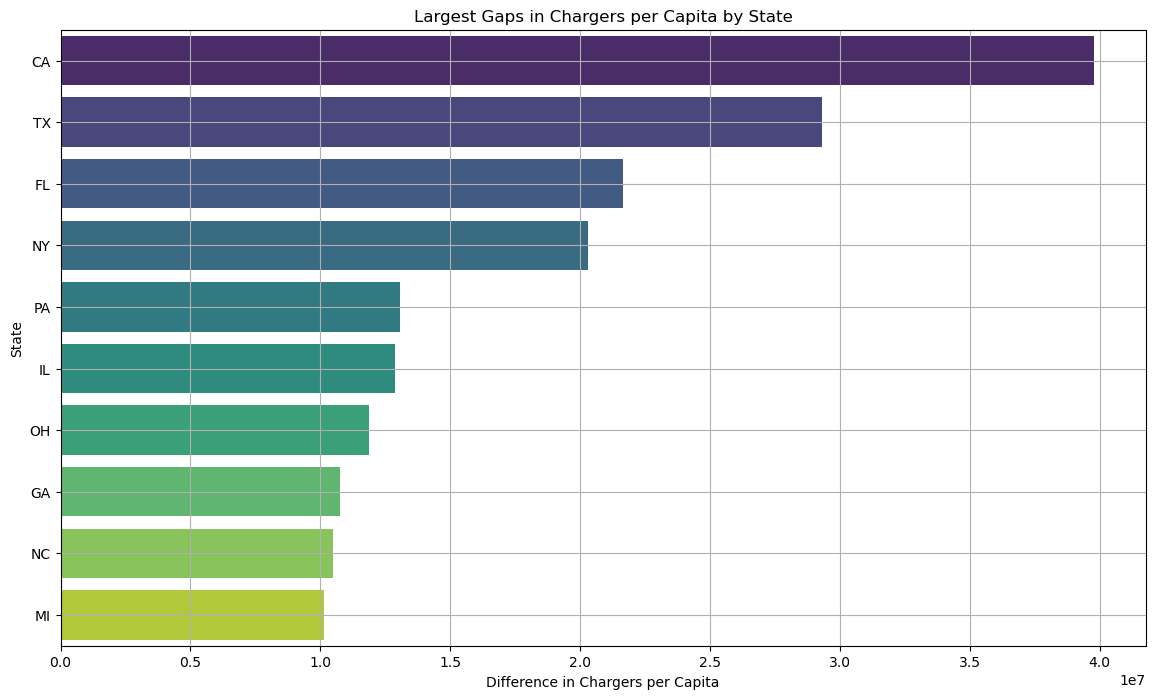

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the largest gaps in chargers per capita
plt.figure(figsize=(14,8))
sns.barplot(x=largest_gaps_df['Difference in Chargers per Capita'], 
            y=largest_gaps_df['State'], palette="viridis")

plt.title('Largest Gaps in Chargers per Capita by State')
plt.xlabel('Difference in Chargers per Capita')
plt.ylabel('State')
plt.grid(True)
plt.show()

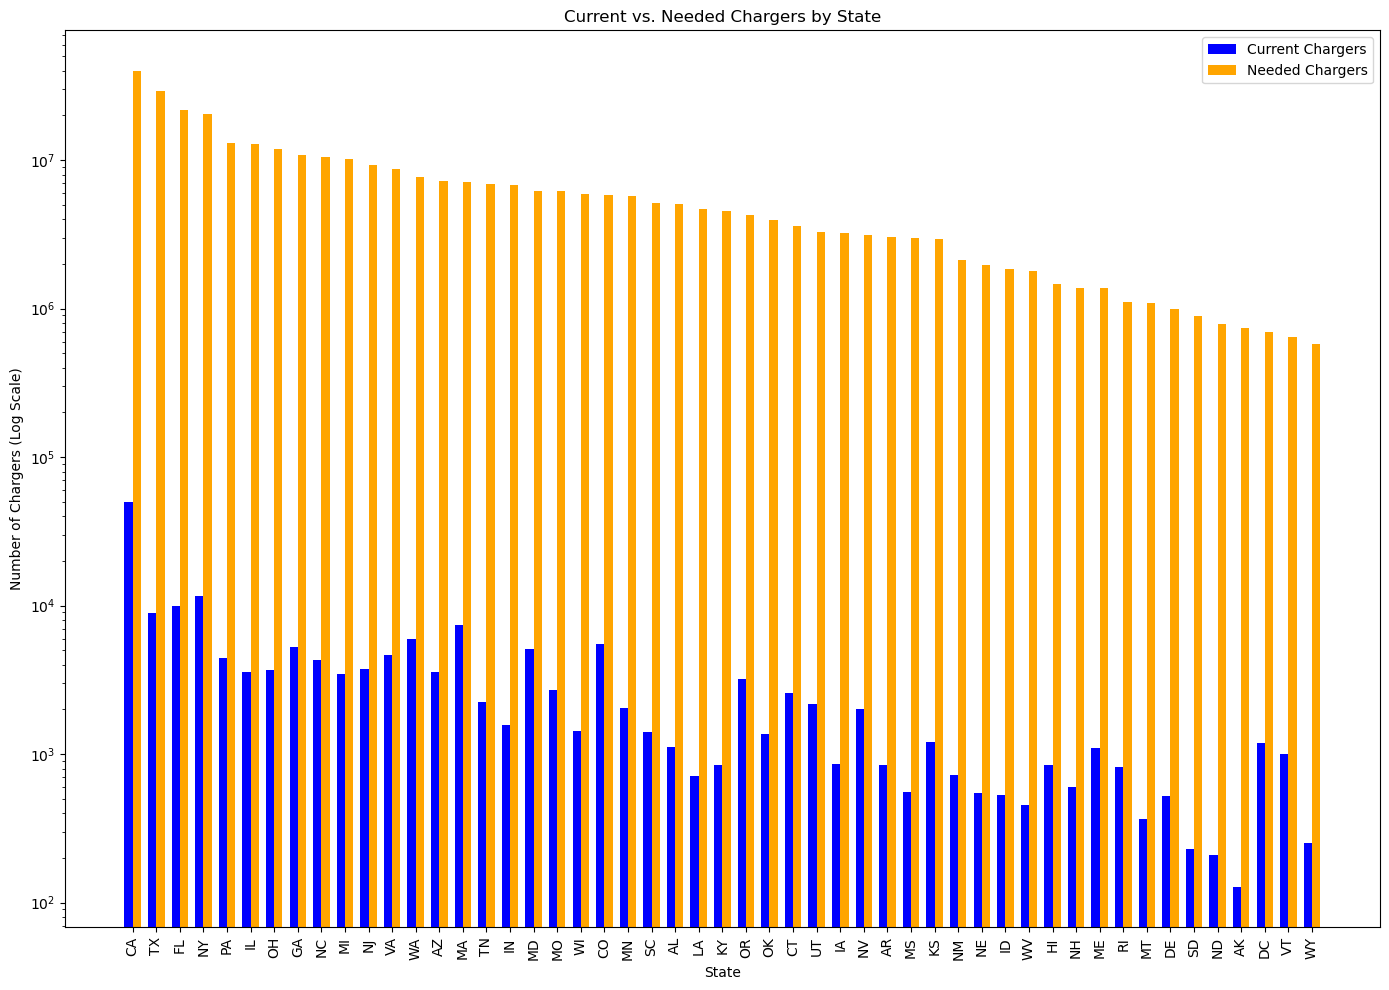

In [78]:
# Plotting the bar chart with log scale for y-axis
plt.figure(figsize=(14,10))
bar_width = 0.35
index = np.arange(len(sorted_df))

# Plot Current Chargers
plt.bar(index, sorted_df['Total Current Chargers'], bar_width, label='Current Chargers', color='blue')

# Plot Needed Chargers
plt.bar(index + bar_width, sorted_df['Total Projected Chargers'], bar_width, label='Needed Chargers', color='orange')

# Labels and title
plt.xlabel('State')
plt.ylabel('Number of Chargers (Log Scale)')
plt.title('Current vs. Needed Chargers by State')
plt.yscale('log')
plt.xticks(index + bar_width / 2, sorted_df['State'], rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

WHAT DOES THIS SHOW?

Significant Gap Between Current and Needed Chargers:

The orange bars are consistently much higher than the blue bars across all states, indicating a substantial shortfall in the current infrastructure compared to the projected need. This discrepancy suggests that a major increase in EV charging infrastructure is necessary to meet future demands.

STATES WITH LARGEST GAPS: States like California (CA), Texas (TX), Florida (FL), and New York (NY) show the largest gaps, reflecting both a high projected need for chargers and relatively high current numbers. This aligns with these states having larger populations and potentially higher EV adoption rates.

UNIFORM NEED ACROSS ALL STATES: Even in states with a smaller current number of chargers, the need for additional chargers is clear. The orange bars are uniformly taller than the blue bars, emphasizing that no state currently has sufficient infrastructure.

For a clearer picture, let's plot by percentage of chargers needed by 2030 vs. current chargers.

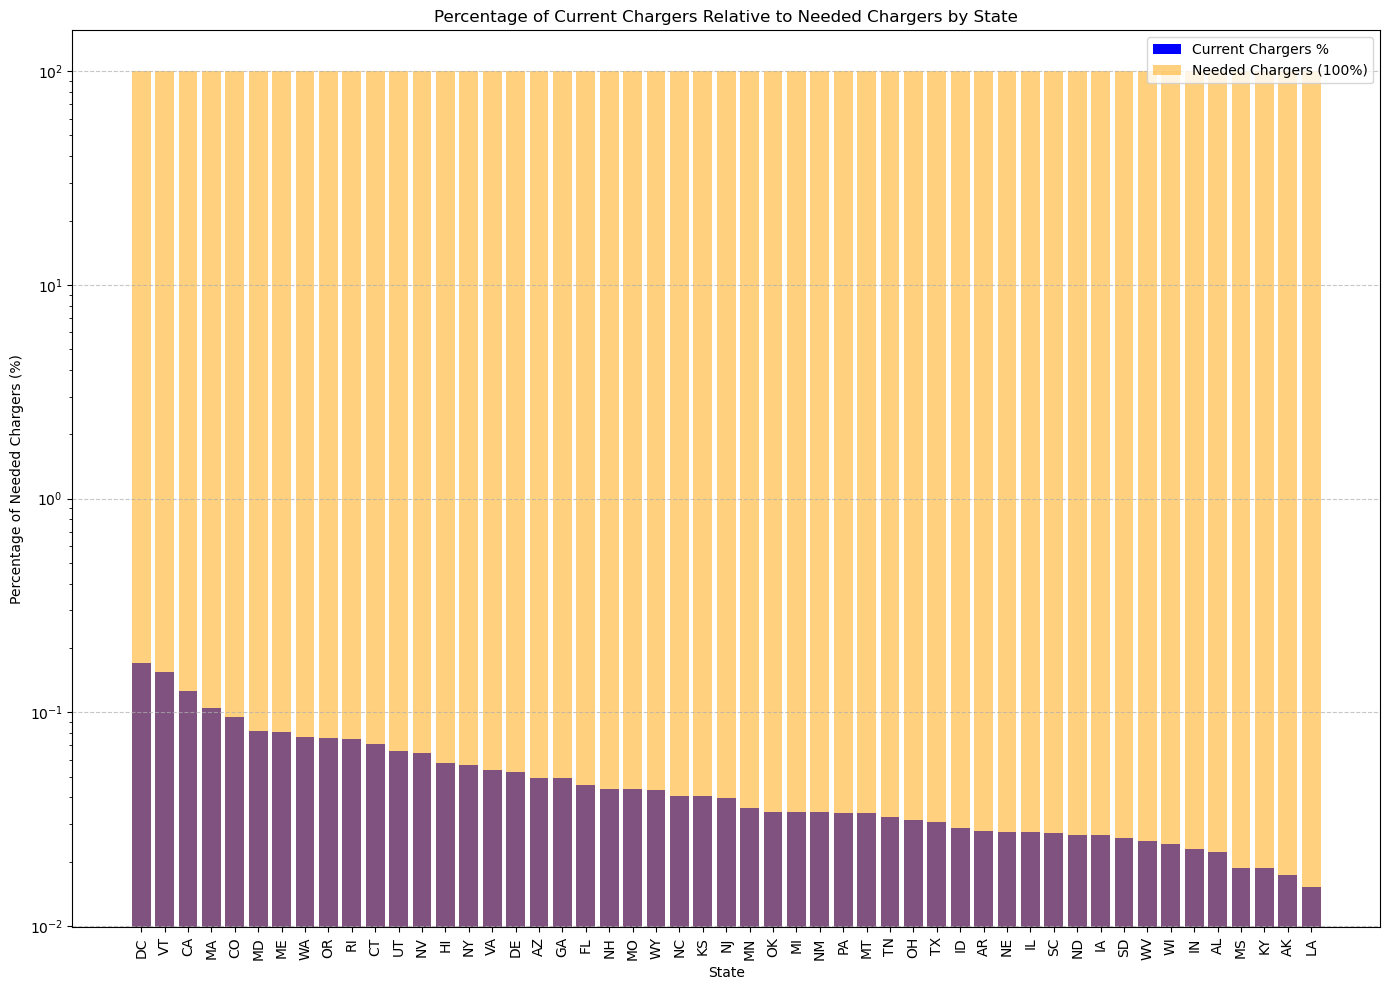

In [79]:
import matplotlib.pyplot as plt

# Calculate the percentage of current chargers relative to needed chargers
ev_analysis_df['Current Chargers %'] = (ev_analysis_df['Total Chargers'] / ev_analysis_df['Projected Chargers per Capita']) * 100

# Plotting the bar chart
plt.figure(figsize=(14, 10))
plt.bar(ev_analysis_df['State'], ev_analysis_df['Current Chargers %'], color='blue', label='Current Chargers %')
plt.bar(ev_analysis_df['State'], 100, color='orange', alpha=0.5, label='Needed Chargers (100%)')

plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Percentage of Needed Chargers (%)')
plt.title('Percentage of Current Chargers Relative to Needed Chargers by State')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here we see that DC (not really a state), VT, CA, MA and MD, while at the top of the game, still have a long way to go in the next six years to prepare for the adoption of EV vehicles. It is no surprise that the bottom 10 are mostly "red states" (WI?) that have Republican legislatures which typically decry EV's since fossil fuels are important to their economies. It would be interesting to see exactly how many fossil fuel companies are in each of those states. 

The chart visualizes the percentage of the current infrastructure relative to the projected need, considering the population size. However, it's essential to note that the Projected Chargers per Capita figure assumes a nationwide average need, which might not perfectly reflect individual state requirements due to variations in EV adoption rates, geographic size, and other factors as mentioned.

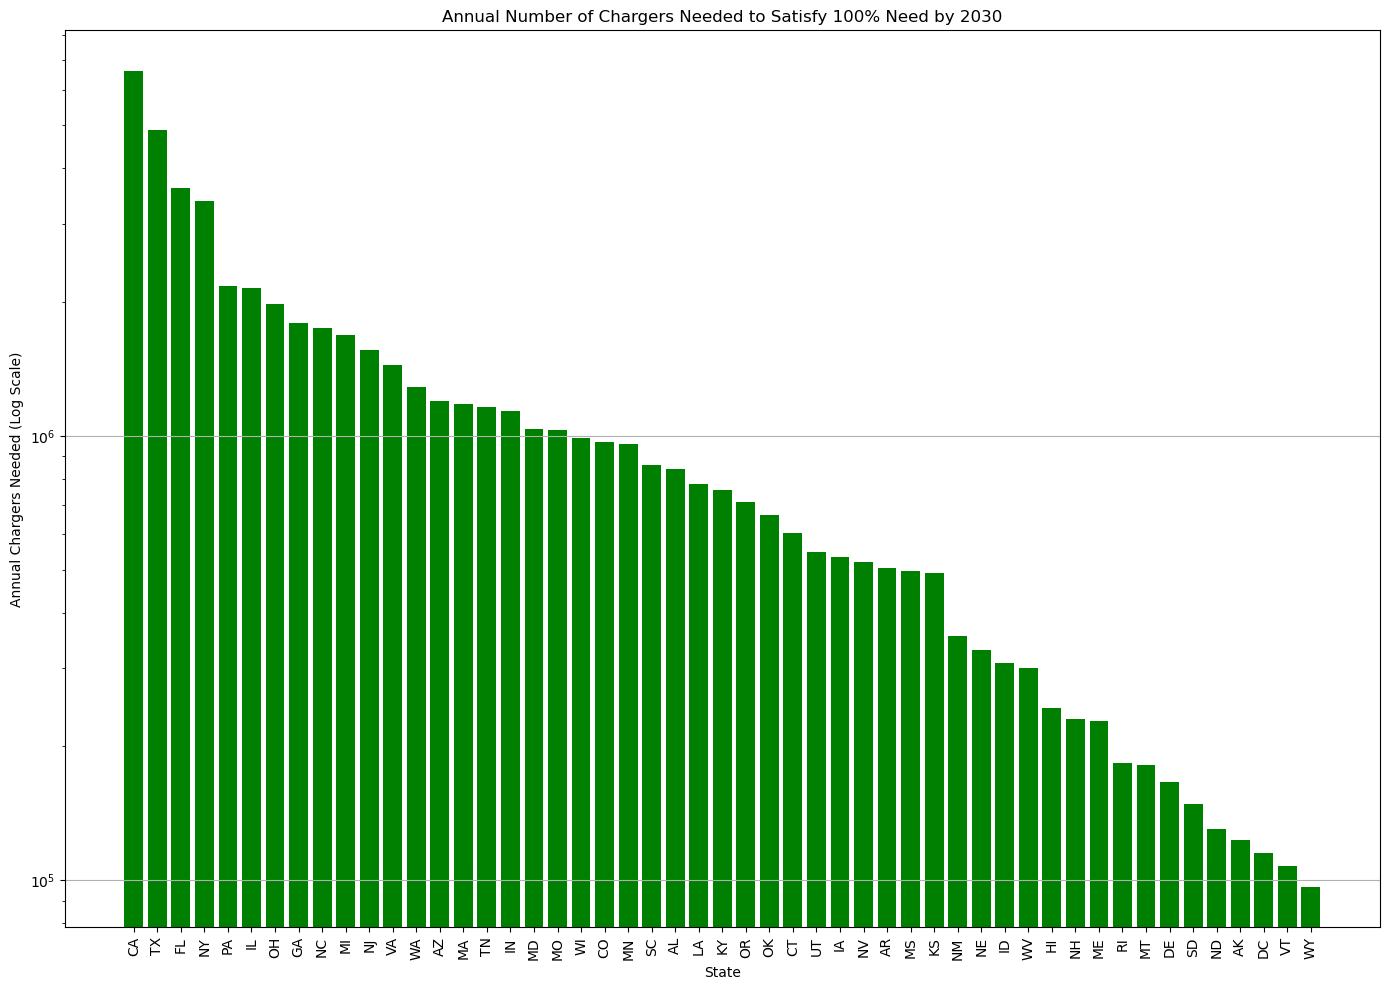

In [80]:
#Let's calculate how many chargers each state will need to install annually:

import matplotlib.pyplot as plt
import numpy as np

# Define the target year and calculate the number of years remaining
target_year = 2030
current_year = 2024
years_remaining = target_year - current_year

# Calculate the difference in chargers needed per state and the annual installation requirement
sorted_df['Annual Installations Needed'] = sorted_df['Difference in Chargers per Capita'] / years_remaining

# Sort the dataframe by 'Annual Installations Needed' for visualization
sorted_df = sorted_df.sort_values(by='Annual Installations Needed', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14,10))
plt.bar(sorted_df['State'], sorted_df['Annual Installations Needed'], color='green')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Annual Chargers Needed (Log Scale)')
plt.title('Annual Number of Chargers Needed to Satisfy 100% Need by 2030')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

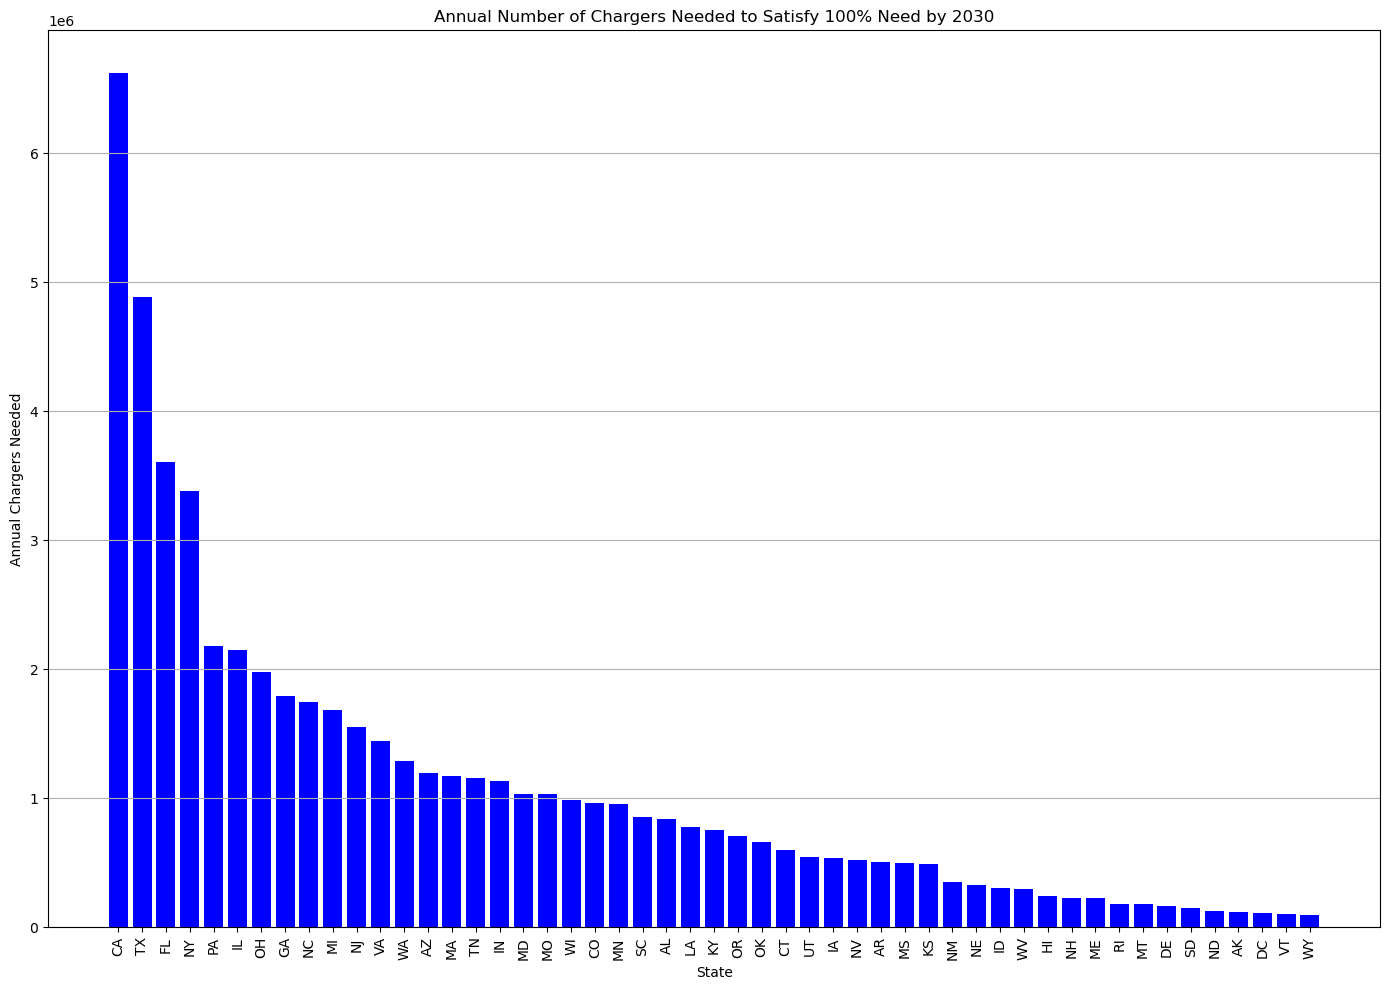

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Define the target year and calculate the number of years remaining
target_year = 2030
current_year = 2024
years_remaining = target_year - current_year

# Calculate the difference in chargers needed per state and the annual installation requirement
sorted_df['Annual Installations Needed'] = sorted_df['Difference in Chargers per Capita'] / years_remaining

# Sort the dataframe by 'Annual Installations Needed' for visualization
sorted_df = sorted_df.sort_values(by='Annual Installations Needed', ascending=False)

# Plot the bar chart with a linear scale
plt.figure(figsize=(14,10))
plt.bar(sorted_df['State'], sorted_df['Annual Installations Needed'], color='blue')
plt.xlabel('State')
plt.ylabel('Annual Chargers Needed')
plt.title('Annual Number of Chargers Needed to Satisfy 100% Need by 2030')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The y-axis of the graph represents the "Annual Chargers Needed" for each state, and the numbers are shown in scientific notation. The label "1e6" at the top of the y-axis represents 1,000,000, so the numbers are in millions.

For example, the bar for California (CA) reaches just above 6, which indicates that California needs to install slightly over 6 million chargers per year to meet the 100% need by 2030. Texas will need just under 5 million each year. Yikes.

To analyze EV adoption rates and make projections based on them, having data spanning various years would be very useful. This data can help us understand the growth trends in EV adoption across different states.

Here's how we can tease out this project:

Historical Data Collection: Collect data on EV registrations in each state for multiple years. This could include annual counts of new registrations or the total number of EVs registered at the end of each year. We will gather data on the population for the same years, if not already available.

Calculate Yearly Adoption Rates: For each year, we will calculate the adoption rate as the number of new EV registrations divided by the total population of that year. This will give us the adoption rate per capita.

Analyze Growth Trends: We will plot the adoption rates over time to observe trends. Are they increasing exponentially, linearly, or at a decreasing rate? We could use statistical models to predict future adoption rates. This could involve linear regression, exponential growth models, or more complex time series forecasting methods.

Project Future Needs: Based on the predicted adoption rates, we could calculate the projected number of EVs by 2030 on our own (rather than use the data we have been using from the National Renewable Energy Laboratory. We could compare to the estimated figures we have been using. Then we could compare the projected infrastructure needs based on the projected EV adoption with the current infrastructure to identify gaps.

Data Requirements: Annual EV registration data by state; Annual population data by statel Data on the number of charging stations and types (Level 1, Level 2, DC Fast) available in each state over time (if possible).

To further enhance our analysis we could perform analysis on:

REGIONS
Clustering by Region: Group states into regions (e.g., West, Midwest, South, Northeast) and analyze the charger needs and current infrastructure by region. This could help identify regional disparities or similarities in EV infrastructure readiness.
Urban vs. Rural Differences: Analyze the difference in charger needs between urban and rural areas. Urban areas may have higher needs due to population density and more frequent short trips, while rural areas might need more chargers for long-distance travel.
Charger Utilization and Efficiency:

CHARGER UTILIZATION RATES: We could estimate the utilization rates of existing chargers. This could involve looking at metrics like the average number of cars per charger or usage patterns (peak vs. off-peak hours).

EFFICIENCY OF CHARGERS: An analysis of the types of chargers (Level 1, Level 2, DC Fast) and their distribution would be useful. Fast chargers are more expensive but charge cars quickly, while Level 1 chargers are slower and cheaper. Understanding the mix can help optimize future investments.

SCENARIO ANALYSIS: We could create different scenarios (e.g., optimistic, pessimistic, baseline) for EV adoption and charger installation needs. This can help policymakers and businesses prepare for different levels of demand.

IMPACT OF POLICIES: It would be useful to show how state-level policies, incentives, and regulations influence EV adoption and charger infrastructure. For instance, states with strong incentives for EV purchases or infrastructure investments may have different trends compared to states without such incentives.

PUBLIC VS. PRIVATE INVESTMENT: An analysis ofthe role of public vs. private investment in charger infrastructure. Understanding who is investing in chargers (government, utilities, private companies) can provide insights into potential funding gaps or opportunities.

COST ANALYSIS: Estimate the costs associated with installing the necessary number of chargers in each state. This could include installation, maintenance, and potential subsidies or incentives.

FUNDING STRATEGIES: What about exploring potential funding strategies or partnerships to finance the needed infrastructure.

CARBON EMISSIONS SAVINGS: We could calculate the potential reduction in carbon emissions from increased EV adoption and the necessary infrastructure. This can be compared against the environmental costs of producing and installing the chargers.

CONSUMER BEHAVIOR AND AWARENESS: We could survey or analyze consumer preferences regarding EVs and charging infrastructure. Understanding barriers to adoption (e.g., range anxiety, cost, availability of chargers) can help target infrastructure investments.
Awareness Campaigns: Analyze the effectiveness of awareness campaigns or education programs in promoting EV adoption.



In [83]:
pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
